source: https://www.kaggle.com/hoonkeng/deep-analysis-on-youtube-trending-videos-eda/notebook


In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'YoutubePrjData'
filename1 = os.path.join('..',path,'dataframe.csv')
filename2 = os.path.join('..', path,'dataframe_all_timestamps.csv')

df = pd.read_csv(filename1)
df_all_timestamps = pd.read_csv(filename2)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171149 entries, 0 to 171148
Data columns (total 19 columns):
video_id                  171149 non-null object
trending_date             171149 non-null object
title                     171149 non-null object
channel_title             171149 non-null object
category_id               171149 non-null int64
category                  171149 non-null object
publish_date              171149 non-null object
publish_time              171149 non-null object
tags                      171149 non-null object
views                     171149 non-null int64
likes                     171149 non-null int64
dislikes                  171149 non-null int64
comment_count             171149 non-null int64
thumbnail_link            171149 non-null object
comments_disabled         171149 non-null bool
ratings_disabled          171149 non-null bool
video_error_or_removed    171149 non-null bool
description               171149 non-null object
country           

In [4]:
df_all_timestamps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356350 entries, 0 to 356349
Data columns (total 19 columns):
video_id                  356350 non-null object
trending_date             356350 non-null object
title                     356350 non-null object
channel_title             356350 non-null object
category_id               356350 non-null int64
category                  356350 non-null object
publish_date              356350 non-null object
publish_time              356350 non-null object
tags                      356350 non-null object
views                     356350 non-null int64
likes                     356350 non-null int64
dislikes                  356350 non-null int64
comment_count             356350 non-null int64
thumbnail_link            356350 non-null object
comments_disabled         356350 non-null bool
ratings_disabled          356350 non-null bool
video_error_or_removed    356350 non-null bool
description               356350 non-null object
country           

In [89]:
df_all_timestamps.head(5)

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,Music,2017-11-10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,cJon8yBKv3g,2017-11-14,Kingsman : Le Cercle d'or (Mickael J Critique),MJ - FERMEZ LA,1,Film & Animation,2017-11-12,17:58:57,"VoxMakers""|""FERMEZ LA""|""Alert Spoiler""|""Matthe...",19487,1596,23,215,https://i.ytimg.com/vi/cJon8yBKv3g/default.jpg,False,False,False,"Avec un peu de retard, voici l'avis de Mickael...",FR
2,g12KeCPRB4Q,2017-11-14,Vide grenier LIVE - 12 Novembre 2017,Kirby-54,20,Gaming,2017-11-12,13:46:18,"Vide grenier""|""vide grenier live""|""brocante""|""...",20744,1032,558,243,https://i.ytimg.com/vi/g12KeCPRB4Q/default.jpg,False,False,False,C'est reparti pour un nouveau compte rendu vid...,FR
3,irIZRH3JlIw,2017-11-14,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,أخبار اليوم,25,News & Politics,2017-11-12,19:08:08,"قناة أخبار اليوم""|""يومية المغرب""|""دولية""|""قضية...",207452,1415,148,90,https://i.ytimg.com/vi/irIZRH3JlIw/default.jpg,False,False,False,لقجع يثور في وجه الإتحاد الإيفواري بسبب الجماه...,FR
4,SnHtzkQZggA,2017-11-14,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعربية,تركييتنا - bizim Türkiye,1,Film & Animation,2017-11-13,19:58:33,"مسلسل عروس اسطنبول""|""عروس اسطنبول""|""عروس اسطنب...",15899,142,10,7,https://i.ytimg.com/vi/SnHtzkQZggA/default.jpg,False,False,False,عروس اسطنبول | اعلان الحلقة 25 | - مترجم للعرب...,FR


In [105]:
counts = df['category'].value_counts()
counts

#The largest number of the video uploads comes from the Entertainment category, followed by People & Blogs. 

Entertainment            50468
People & Blogs           28045
News & Politics          20327
Sports                   12561
Comedy                   10358
Music                    10145
Howto & Style             9580
Film & Animation          8460
Gaming                    5318
Education                 3897
Science & Technology      3404
Autos & Vehicles          3274
Pets & Animals            2271
Nonprofits & Activism     1779
Travel & Events            812
Shows                      435
Movies                      12
Trailers                     3
Name: category, dtype: int64

Text(0, 0.5, 'Number of videos by category')

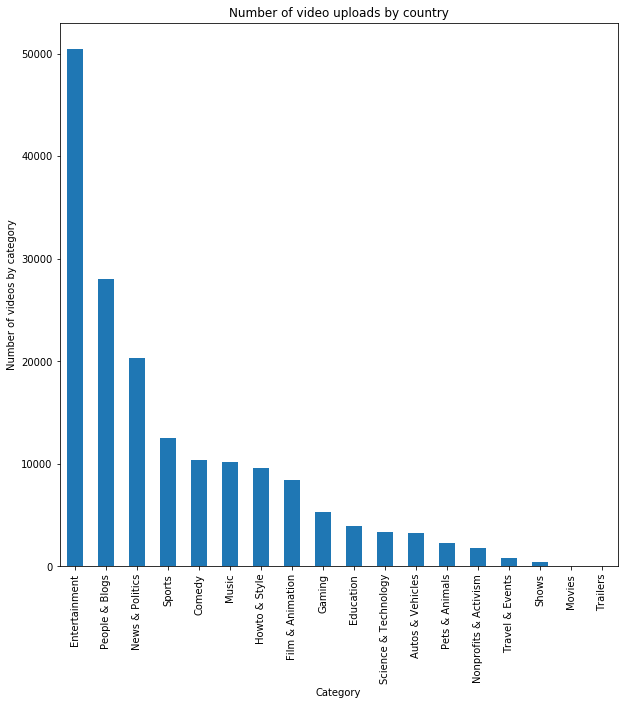

In [106]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 

counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame

ax.set_title('Number of video uploads by country') # Give the plot a main title
ax.set_xlabel('Category') # Set text for the x axis
ax.set_ylabel('Number of videos by category')# Set text for y axis

In [107]:
counts = df['country'].value_counts()
counts
#Most videos are uploaded from channels in Russia, and least ones from channels in GB.

RU    30783
MX    27900
FR    24085
DE    22965
CA    17338
IN    15222
KR    13793
JP    10808
US     5185
GB     3070
Name: country, dtype: int64

Text(0, 0.5, 'Number of autos')

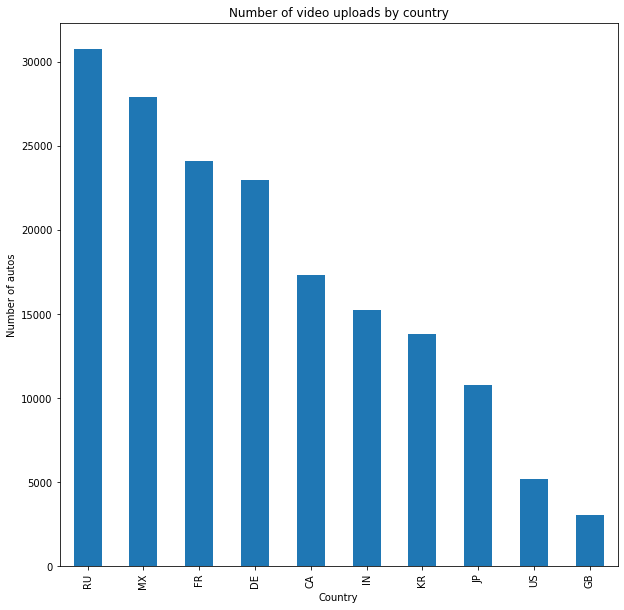

In [108]:
fig = plt.figure(figsize=(10,10)) # define plot area
ax = fig.gca() # define axis 

counts.plot.bar(ax = ax) # Use the plot.bar method on the counts data frame

ax.set_title('Number of video uploads by country') # Give the plot a main title
ax.set_xlabel('Country') # Set text for the x axis
ax.set_ylabel('Number of autos')# Set text for y axis

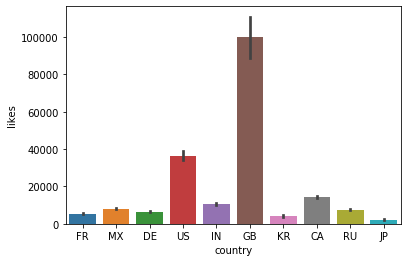

In [11]:
ax = sns.barplot(x= 'country', y='likes', data= df) #Eventhough GB is the least active country in video uploads, GB 
#is most active country in views, likes, dislikes, comment_count engagements.

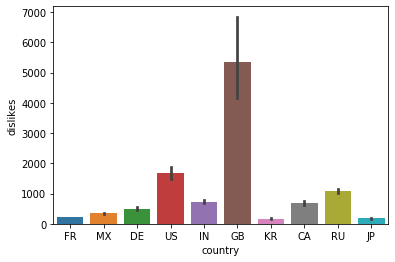

In [12]:
ax = sns.barplot(x= 'country', y= 'dislikes', data= df)

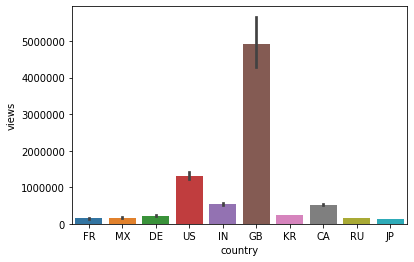

In [13]:
ax = sns.barplot(x= 'country', y='views', data= df)

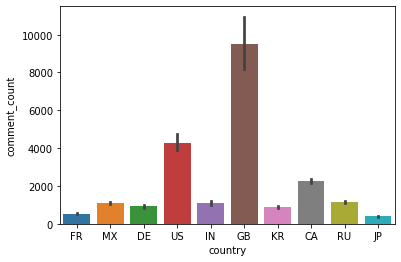

In [14]:
ax = sns.barplot(x= 'country', y='comment_count', data= df)

In [16]:
df.loc[df['country'] == 'GB'] #I created a dataframe only about GB.

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
432,rHwDegptbI4,2017-11-14,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,News & Politics,2017-11-13,01:45:13,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,GB
433,AumaWl0TNBo,2017-11-14,How My Relationship Started!,PointlessBlogVlogs,24,Entertainment,2017-11-11,17:00:00,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,GB
434,-N5eucPMTTc,2017-11-14,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,People & Blogs,2017-11-10,19:19:43,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,GB
436,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,Music,2017-11-10,15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
466,mCx26FLXWuI,2017-11-14,Seth Rollins & Dean Ambrose vs. Cesaro & Sheam...,WWE,17,Sports,2017-11-07,04:52:25,"wwe|""world wrestling entertainment""|""wrestling...",1689382,24186,3330,3414,https://i.ytimg.com/vi/mCx26FLXWuI/default.jpg,False,False,False,In a main event with enormous Survivor Series ...,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170148,oTn329CjrRA,2018-06-14,LeBron James and Draymond Green Face Off in NB...,UNINTERRUPTED,17,Sports,2018-06-11,17:28:35,"UNINTERRUPTED|""lebron james""|""cleveland cavali...",129026,1638,29,275,https://i.ytimg.com/vi/oTn329CjrRA/default.jpg,False,False,False,The Cavs and Warriors stars' routines for the ...,GB
170149,VhQmTmqcEY0,2018-06-14,Juanes - Pa Dentro,JuanesVEVO,10,Music,2018-06-01,02:00:01,"Juanes|""Pa""|""Dentro""|""Universal""|""Music""|""Lati...",21853809,78212,5701,4780,https://i.ytimg.com/vi/VhQmTmqcEY0/default.jpg,False,False,False,Music video by Juanes performing Pa Dentro. © ...,GB
170150,ek1ePFp-nBI,2018-06-14,Halloween - Official Trailer (HD),Universal Pictures,24,Entertainment,2018-06-08,14:00:03,"halloween|""horror""|""horror movie""|""scary movie...",12955997,200539,7647,35147,https://i.ytimg.com/vi/ek1ePFp-nBI/default.jpg,False,False,False,"This October, Michael Myers returns. Watch the...",GB
170151,QRyzwPzxpcs,2018-06-14,Sea of Thieves - E3 2018 - Cursed Sails and Fo...,Xbox,20,Gaming,2018-06-10,20:29:46,"Xbox|""Xbox360""|""xbox 360""|""Xbox One""|""Rare""|""S...",1152245,2810,247,520,https://i.ytimg.com/vi/QRyzwPzxpcs/default.jpg,False,False,False,Sea of Thieves' world continues to evolve in t...,GB


In [79]:
gb_df = df.loc[df['country'] == 'GB']

In [110]:
counts = gb_df['category'].value_counts()
counts

#The category with the most video counts in GB is Music, followed by Entertainment.

Music                    844
Entertainment            787
People & Blogs           268
Sports                   203
Film & Animation         184
Howto & Style            183
Comedy                   181
Gaming                   166
News & Politics          116
Education                 37
Science & Technology      37
Pets & Animals            36
Autos & Vehicles          14
Travel & Events           10
Nonprofits & Activism      3
Shows                      1
Name: category, dtype: int64

Text(0, 0.5, 'Counts')

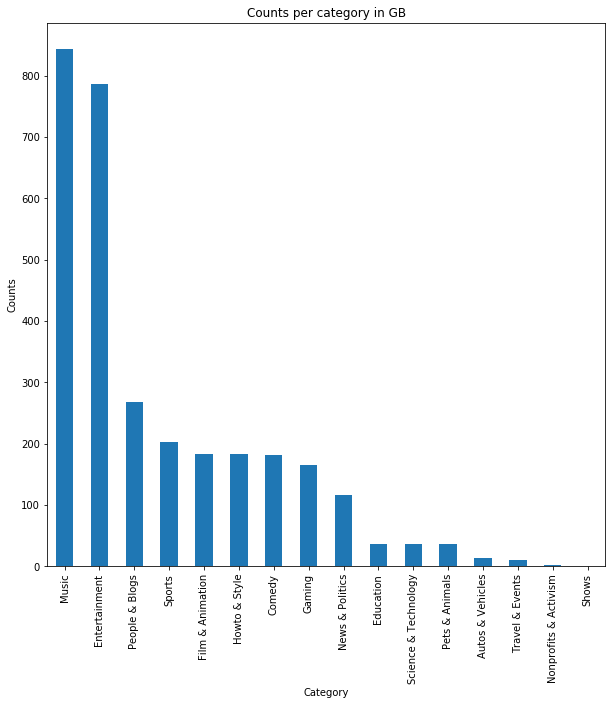

In [111]:
fig = plt.figure(figsize=(10,10))
ax = fig.gca()

counts.plot.bar(ax = ax)

ax.set_title('Counts per category in GB')
ax.set_xlabel('Category')
ax.set_ylabel('Counts')

In [ ]:
#And the most engagement with views,likes,dislikes and comments comes from that category.

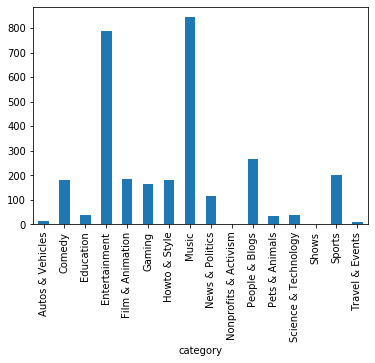

In [113]:
gb_df.groupby('category')['views'].nunique().plot(kind='bar')
plt.show()

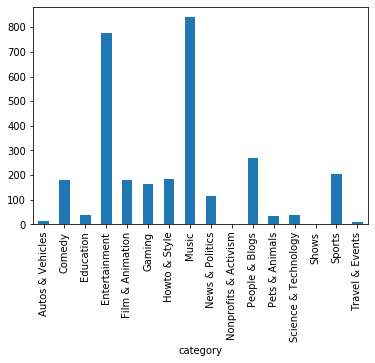

In [21]:
gb_df.groupby('category')['likes'].nunique().plot(kind='bar')
plt.show()

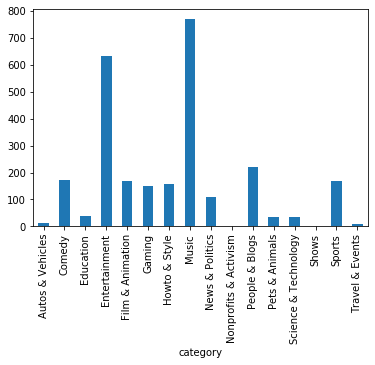

In [22]:
gb_df.groupby('category')['dislikes'].nunique().plot(kind='bar')
plt.show()

In [31]:
gb_df.loc[gb_df['category'] == 'Music']

,video_id,trending_date,title,channel_title,category_id,category,publish_date,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
436,fiusxyygqGk,2017-11-14,Marshmello - You & Me (Official Music Video),marshmello,10,Music,2017-11-10,15:00:03,"selena gomez wolves|""alone marshmello""|""marshm...",3407008,207262,3167,13279,https://i.ytimg.com/vi/fiusxyygqGk/default.jpg,False,False,False,PURCHASE YOU & ME HERE ▶ https://smarturl.it/m...,GB
614,kqbJCW-jxYM,2017-11-14,"Lil Kim Keeps It Real On Nicki Minaj, Biggie R...",HOT 97,10,Music,2017-11-03,13:48:20,"hot97|""hot97app""|""music""|""video""|""hip hop""|""ra...",407075,5819,598,2815,https://i.ytimg.com/vi/kqbJCW-jxYM/default.jpg,False,False,False,HOT 97 App: http://www.hot97.com/hot97app\n\nY...,GB
653,676hNIhKO2M,2017-11-14,Madison Beer - Say It To My Face (Official Audio),MadisonBeerMusicVEVO,10,Music,2017-11-03,13:59:25,"Madison|""Beer""|""Say""|""It""|""To""|""My""|""Face""|""(O...",1053402,47309,1408,2407,https://i.ytimg.com/vi/676hNIhKO2M/default.jpg,False,False,False,Stream & Download ‘Say It To My Face’ now from...,GB
659,Bu2Djx2ejlA,2017-11-14,The Making of a Song – “Gorgeous”,AT&T,10,Music,2017-11-01,15:01:19,"Taylor Swift NOW|""Taylor Swift""|""Swifties""|""Re...",1961295,61000,1281,0,https://i.ytimg.com/vi/Bu2Djx2ejlA/default.jpg,True,False,False,Get an unprecedented glimpse into Taylor's son...,GB
661,Tl_Qfj8780M,2017-11-14,Milck - Quiet [Official Video],MILCK,10,Music,2017-11-03,13:01:57,"quiet|""milck""|""ickw""|""i cant keep quiet""|""milk...",213094,2951,339,193,https://i.ytimg.com/vi/Tl_Qfj8780M/default.jpg,False,False,False,Trigger Warning: This video portrays subtle ye...,GB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170141,IDpWeURKkbI,2018-06-14,SHINee 샤이니 'I Want You' MV,SMTOWN,10,Music,2018-06-11,09:00:04,"샤이니|""SHINee""|""태민""|""민호""|""온유""|""키""|""종현""|""TAEMIN""|...",2085778,300278,881,19531,https://i.ytimg.com/vi/IDpWeURKkbI/default.jpg,False,False,False,SHINee's the 6th album 'The Story of Light’ EP...,GB
170143,IMwganRtaPM,2018-06-14,Charlie Puth - In My Blood Live (Shawn Mendes ...,BBC Radio 1,10,Music,2018-06-08,13:49:47,"Charlie Puth|""Shawn Mendes""|""In My Blood""|""Liv...",813101,55587,863,2586,https://i.ytimg.com/vi/IMwganRtaPM/default.jpg,False,False,False,Charlie Puth covers his mate Shawn Mendes' tra...,GB
170146,V15BYnSr0P8,2018-06-14,Live It Up (Official Video) - Nicky Jam feat. ...,NickyJamTV,10,Music,2018-06-08,11:58:38,"Nicky Jam|""NickyJamPR""|""latin""|""will smith""|""E...",20409647,568680,44854,64390,https://i.ytimg.com/vi/V15BYnSr0P8/default.jpg,False,False,False,Nicky Jam feat. Will Smith & Era Istrefi - Liv...,GB
170147,mUYsp5baMXo,2018-06-14,Maroon 5 - Three Little Birds,Maroon5VEVO,10,Music,2018-06-09,07:01:01,"Maroon 5|""Adam Levine""|""3 Little Birds""|""Girls...",5517903,243696,12874,16841,https://i.ytimg.com/vi/mUYsp5baMXo/default.jpg,False,False,False,3 Little Birds” is out now.http://smarturl.it/...,GB


In [39]:
music_df=gb_df.loc[gb_df['category'] == 'Music']

In [84]:
top_vids_df=music_df.sort_values(by='views', ascending=False)

In [85]:
top_msc_df=top_vids_df.drop(columns=['video_id', 'trending_date', 'category_id', 'category', 'publish_date', 'publish_time', 'tags','thumbnail_link','comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'description', 'country'])

In [86]:
top_msc_df.head(3)

,title,channel_title,views,likes,dislikes,comment_count
119441,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,424538912,2818771,149275,99380
149316,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,337621571,2581961,166549,113564
105767,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,328860380,3823879,215530,225216


In [70]:
top_three = top_msc_df.head(3)

In [71]:
top_three

,title,channel_title,views,likes,dislikes,comment_count
119441,Nicky Jam x J. Balvin - X (EQUIS) | Video Ofic...,NickyJamTV,424538912,2818771,149275,99380
149316,"Te Bote Remix - Casper, Nio García, Darell, Ni...",Flow La Movie,337621571,2581961,166549,113564
105767,Bad Bunny - Amorfoda | Video Oficial,Bad Bunny,328860380,3823879,215530,225216


Text(0, 0.5, 'Views')

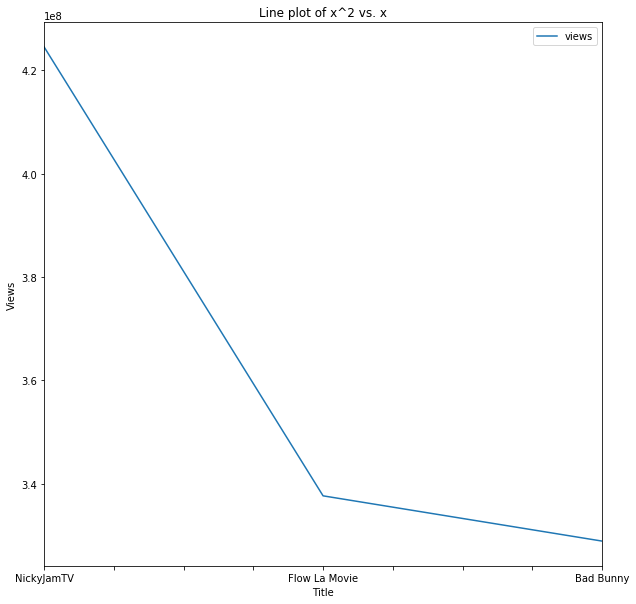

In [88]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis       

top_three.plot(x = 'channel_title', y = 'views', ax = ax) ## line is the default plot type

ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('Title') # Set text for the x axis
ax.set_ylabel('Views')# Set text for y axis

Text(0, 0.5, 'Likes')

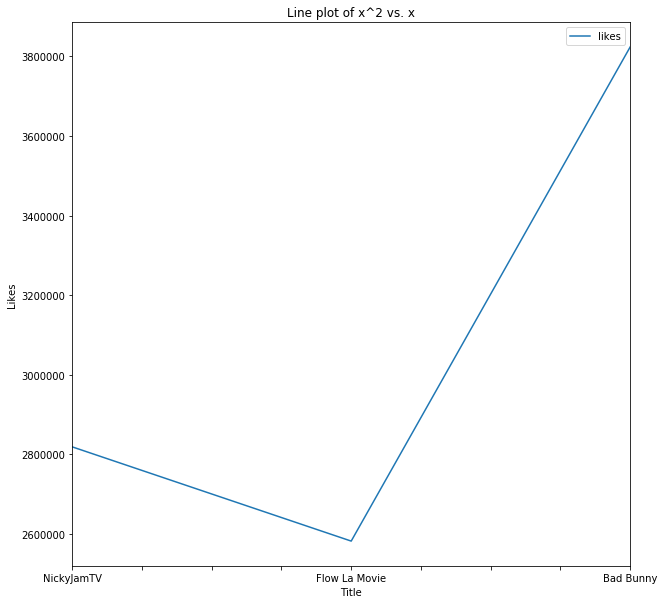

In [72]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis       

top_three.plot(x = 'channel_title', y = 'likes', ax = ax) ## line is the default plot type

ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('Title') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis

Text(0, 0.5, 'Likes')

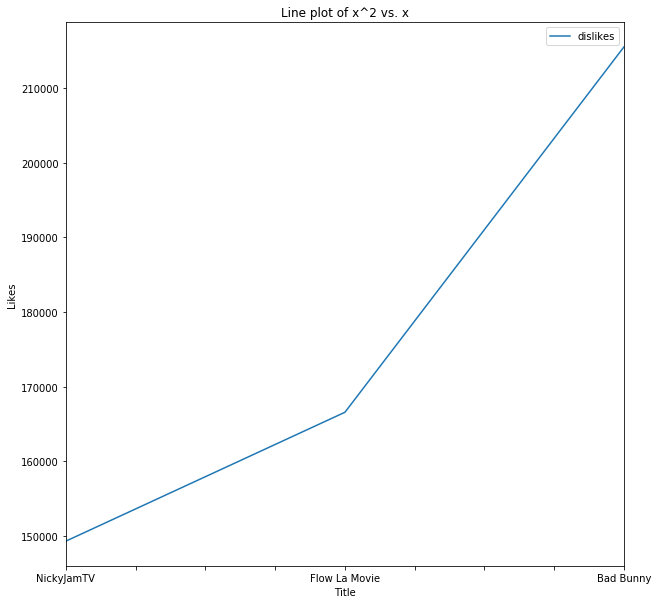

In [73]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis       

top_three.plot(x = 'channel_title', y = 'dislikes', ax = ax) ## line is the default plot type

ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('Title') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis

Text(0, 0.5, 'Likes')

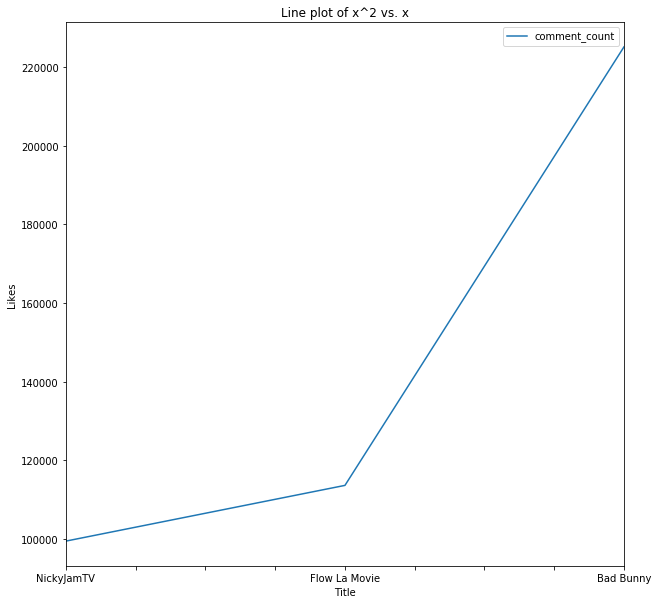

In [74]:
fig = plt.figure(figsize=(10, 10)) # define plot area
ax = fig.gca() # define axis       

top_three.plot(x = 'channel_title', y = 'comment_count', ax = ax) ## line is the default plot type

ax.set_title('Line plot of x^2 vs. x') # Give the plot a main title
ax.set_xlabel('Title') # Set text for the x axis
ax.set_ylabel('Likes')# Set text for y axis